# Imports

In [752]:
import numpy as np
from sympy import *

In [2]:
def round2zero(m, e):
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if (isinstance(m[i,j], Float) and m[i,j] < e):
                m[i,j] = 0


# DH Matrix

In [753]:
#1st matrix
d = Matrix(np.identity(4));
d[2,3] = symbols('d')

#2nd matrix
theta = Matrix(np.identity(4));
theta[0:2,0:2] = Matrix([[cos(symbols('theta')),-sin(symbols('theta'))],[sin(symbols('theta')),cos(symbols('theta'))]])
init_printing()
print(theta)
#3rd matrix
a = Matrix(np.identity(4));
a[0,3] = symbols('a')

#4th matrix
alpha = Matrix(np.identity(4));
alpha[1:3,1:3] = Matrix([[cos(symbols('alpha')),-sin(symbols('alpha'))],[sin(symbols('alpha')),cos(symbols('alpha'))]])

#Transformation matrix
T = alpha*a*theta*d;

Matrix([[cos(theta), -sin(theta), 0.0, 0.0], [sin(theta), cos(theta), 0.0, 0.0], [0.0, 0.0, 1.00000000000000, 0.0], [0.0, 0.0, 0.0, 1.00000000000000]])


In [754]:
base = [0,symbols('a0'),symbols('theta0'),symbols('d0')]
joint1 = [np.pi/2,symbols('a1'),symbols('theta1'),symbols('d1')]
joint2 = [0,symbols('a2'),symbols('theta2'),symbols('d2')]
joint3 = [0,symbols('a3'),symbols('theta3'),symbols('d3')]
jointef = [-np.pi/2,symbols('a4'),0,symbols('d4')]
Tor0 = T.subs([('alpha',base[0]),('a',base[1]),('theta',base[2]),('d',base[3])])
T01 = T.subs([('alpha',joint1[0]),('a',joint1[1]),('theta',joint1[2]),('d',joint1[3])])
T12 = T.subs([('alpha',joint2[0]),('a',joint2[1]),('theta',joint2[2]),('d',joint2[3])])
T23 = T.subs([('alpha',joint3[0]),('a',joint3[1]),('theta',joint3[2]),('d',joint3[3])])
T3ef = T.subs([('alpha',jointef[0]),('a',jointef[1]),('theta',jointef[2]),('d',jointef[3])])

Toref = Tor0*T01*T12*T23*T3ef;
To3 = Tor0*T01*T12*T23;
To2 = Tor0*T01*T12;
To1 = Tor0*T01;

temp= simplify(Toref*np.array([[0],[0],[0],[1]]))
temp1= simplify(To3*np.array([[0],[0],[0],[1]]))
temp2= simplify(To2*np.array([[0],[0],[0],[1]]))
temp3= simplify(To1*np.array([[0],[0],[0],[1]]))
temp4= simplify(Tor0*np.array([[0],[0],[0],[1]]))
#T0ef
#T0ef[1,:]*np.array([[0],[0],[0],[1]])
#T0ef[2,:]*np.array([[0],[0],[0],[1]])
#T0ef[3,:]*np.array([[0],[0],[0],[1]])
temp = nsimplify(temp,tolerance=1e-10,rational=True)
temp_1 = nsimplify(temp1,tolerance=1e-10,rational=True)
temp_2 = nsimplify(temp2,tolerance=1e-10,rational=True)
temp_3 = nsimplify(temp3,tolerance=1e-10,rational=True)
temp_4 = nsimplify(temp4,tolerance=1e-10,rational=True)
print(temp_4)
print(temp_3)
print(temp_2)
temp.subs([('theta1',0),('theta2',0),('theta3',0),('theta0',0)])
#print(temp)

Matrix([[a0], [0], [d0], [1]])
Matrix([[a0 + a1*cos(theta0) + d1*sin(theta0)], [a1*sin(theta0) - d1*cos(theta0)], [d0], [1]])
Matrix([[a0 + a1*cos(theta0) + a2*cos(theta0)*cos(theta1) + d1*sin(theta0) + d2*sin(theta0)], [a1*sin(theta0) + a2*sin(theta0)*cos(theta1) - d1*cos(theta0) - d2*cos(theta0)], [a2*sin(theta1) + d0], [1]])


⎡a₀ + a₁ + a₂ + a₃ + a₄⎤
⎢                      ⎥
⎢    -d₁ - d₂ - d₃     ⎥
⎢                      ⎥
⎢       d₀ + d₄        ⎥
⎢                      ⎥
⎣          1           ⎦

In [5]:
trigsimp((expand(simplify(temp[0]**2+temp[1]**2))).rewrite(np.cos))
#simplify((temp[0]+temp[1])**2)

-d1 - d2 - d3
1.0*a0*sin(theta0) - 1.0*x*sin(theta0) + 1.0*y*cos(theta0)


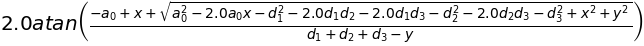

In [770]:
temp2=simplify(nsimplify(Tor0.inv()*temp,tolerance=1e-10,rational=True))
#print(temp2)
temp3= simplify(Tor0.inv()*np.array([[symbols('x')],[symbols('y')],[symbols('z')],[1]]))
print(temp2[1])
print(temp3[1])
res0 = solve(temp3[1] - temp2[1], 'theta0')
res0[0]

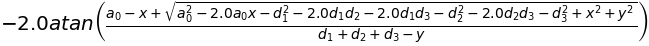

In [771]:
res0[1]

In [775]:
"""
temp4=temp2[0].subs(symbols('theta1')+symbols('theta2')+symbols('theta3'),symbols('c'))
#temp4=temp4.subs(symbols('theta1')+symbols('theta2'),symbols('theta12'))
temp5=temp2[2].subs(symbols('theta1')+symbols('theta2')+symbols('theta3'),symbols('c'))
#temp5=temp5.subs(symbols('theta1')+symbols('theta2'),symbols('theta12'))
simplify(expand(temp4**2+temp5**2))
a4 = symbols('a4')
a1 = symbols('a1')
d4 = symbols('d4')
c = symbols('c')
#print(temp4)
temp4 = temp4-(a4*cos(c)-d4*sin(c)+a1)
print(temp4)
#print(temp5)
temp5 =temp5 - a4*sin(c)-d4*cos(c)
print(temp5)
temp6 = temp3[0]-(a4*cos(c)-d4*sin(c)+a1);
print(temp6)
temp7 = temp3[2]- a4*sin(c)-d4*cos(c);
print(temp7)
#print(simplify(temp4**2+temp5**2))
res2 = solve(simplify(temp4**2+temp5**2)-(temp6)**2-(temp7)**2,'theta2')
print('solved')
c = simplify(temp4*cos('theta1')+temp5*sin('theta1'));
print(c)
a = temp7;#sin
b = temp6;#cos
res1 = np.array(symbols(['0','0']));
res1[0] = atan2(a,b)+atan2((a**2+b**2-c**2)**(0.5),c)
res1[1] = atan2(a,b)-atan2((a**2+b**2-c**2)**(0.5),c)
"""
temp4=temp2[0].subs(symbols('theta1')+symbols('theta2')+symbols('theta3'),symbols('c'))
#temp4=temp4.subs(symbols('theta1')+symbols('theta2'),symbols('theta12'))
temp5=temp2[2].subs(symbols('theta1')+symbols('theta2')+symbols('theta3'),symbols('c'))
#temp5=temp5.subs(symbols('theta1')+symbols('theta2'),symbols('theta12'))
simplify(expand(temp4**2+temp5**2))
a4 = symbols('a4')
a1 = symbols('a1')
d4 = symbols('d4')
c = symbols('c')
temp4 = temp4-(a4*cos(c)-d4*sin(c)+a1)
print(temp4)
temp5 =temp5 - a4*sin(c)-d4*cos(c)
print(temp5)
temp6 = temp3[0]-(a4*cos(c)-d4*sin(c)+a1);
print(temp6)
temp7 = temp3[2]- a4*sin(c)-d4*cos(c);
print(temp7)
print(simplify(temp4**2+temp5**2))
res2 = solve(simplify(temp4**2+temp5**2)-(temp6)**2-(temp7)**2,'theta2')
print('solved')
c = simplify(temp4*cos('theta1')+temp5*sin('theta1'));
print(c)
a = temp7;
b = temp6;
res1 = np.array(symbols(['0','0']));
res1[0] = atan2(a,b)+atan2((a**2+b**2-c**2)**(0.5),c)
res1[1] = atan2(a,b)-atan2((a**2+b**2-c**2)**(0.5),c)

a2*cos(theta1) + a3*cos(theta1 + theta2)
a2*sin(theta1) + a3*sin(theta1 + theta2)
-a1 - a4*cos(c) + d4*sin(c) + 1.0*(a0*sin(theta0)**2 - a0 + x*cos(theta0)**2 + y*sin(2*theta0)/2)/cos(theta0)
-a4*sin(c) - 1.0*d0 - d4*cos(c) + 1.0*z
a2**2 + 2*a2*a3*cos(theta2) + a3**2
solved
a2 + a3*cos(theta2)


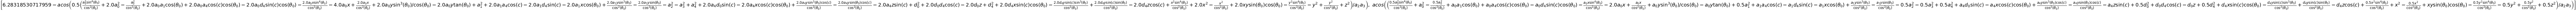

In [772]:
res2

In [474]:
atan2(1,3**0.5)*180/np.pi

In [602]:
param0 = (symbols('a0'),symbols('a1'),symbols('a2'),symbols('a3'),symbols('a4'),symbols('d0'),symbols('d1'),symbols('d2'),symbols('d3'),symbols('d4'),symbols('x'),symbols('y'),symbols('z'));
param2 = (symbols('a0'),symbols('a1'),symbols('a2'),symbols('a3'),symbols('a4'),symbols('d0'),symbols('d1'),symbols('d2'),symbols('d3'),symbols('d4'),symbols('x'),symbols('y'),symbols('z'),symbols('c'),symbols('theta0'));
param1 = (symbols('a0'),symbols('a1'),symbols('a2'),symbols('a3'),symbols('a4'),symbols('d0'),symbols('d1'),symbols('d2'),symbols('d3'),symbols('d4'),symbols('x'),symbols('y'),symbols('z'),symbols('c'),symbols('theta0'),symbols('theta2'));
param_fk =(symbols('a0'),symbols('a1'),symbols('a2'),symbols('a3'),symbols('a4'),symbols('d0'),symbols('d1'),symbols('d2'),symbols('d3'),symbols('d4'),symbols('theta0'),symbols('theta1'),symbols('theta2'),symbols('theta3'));
f_theta0 = lambdify(param0, res0)
f_theta1 = lambdify(param1, res1,'math')
f_theta2 = lambdify(param2, res2)

f_fk = lambdify( param_fk,np.array(temp))
f_fk1 = lambdify( param_fk,np.array(temp_1))
f_fk2 = lambdify( param_fk,np.array(temp_2))
f_fk3 = lambdify( param_fk,np.array(temp_3))
f_fk4 = lambdify( param_fk,np.array(temp_4))
print(f_theta1)
print(f_theta2)
print(f_theta0)
print(f_fk,f_fk1,f_fk2,f_fk3,f_fk4)
f_fk
#f_theta1

<function _lambdifygenerated at 0x000001DEC59EFF28>
<function _lambdifygenerated at 0x000001DEC59EFD90>
<function _lambdifygenerated at 0x000001DEC60B3400>
<function _lambdifygenerated at 0x000001DEC89E1620> <function _lambdifygenerated at 0x000001DEC5733D08> <function _lambdifygenerated at 0x000001DEC5733378> <function _lambdifygenerated at 0x000001DEC8603F28> <function _lambdifygenerated at 0x000001DEC8603D08>


<function _lambdifygenerated(a0, a1, a2, a3, a4, d0, d1, d2, d3, d4, theta0, theta1, theta2, theta3)>

# Finding offsets

In [767]:


c = 0.5*np.pi+2.219992532;
x=-867.9713127
#x = -930
print(x)
y=-93.8392792
z=-104.4901007
j=0
i=0;
theta0 = f_theta0(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,x,y,z)
#c=0;
print(theta0[j])

theta2=f_theta2(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,x,y,z,c,theta0[j])
print(theta2[i])

theta1=f_theta1(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,x,y,z,c,theta0[j],theta2[i])
print(theta1[i])
print(f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i],theta2[i],c-theta1[i]-theta2[i]))
print(theta0[j])

-867.9713127
0.0
6.224652014868315
3.1415928586583357
[[-867.9713127000001], [-93.8392792], [-104.49010069999768], [1]]
0.0


In [252]:
(theta2[i])*180/np.pi
#theta0[j]+np.pi/2

In [659]:
f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j]-np.pi/6,theta1[i],theta2[i],0.5*np.pi+2.219992532-theta1[i]-theta2[i])

In [660]:
f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j]-np.pi/6,theta1[i]-np.pi/6,theta2[i],0.5*np.pi+2.219992532-theta1[i]-theta2[i]+np.pi/6)

In [667]:
f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j]-np.pi/6,theta1[i]-np.pi/6,theta2[i]+np.pi/6,0.5*np.pi+2.219992532-theta1[i]-theta2[i]-np.pi/6+np.pi/6)

In [668]:
f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i],theta2[i]-np.pi/6,0.5*np.pi+2.219992532-theta1[i]-theta2[i]+np.pi/6)

In [670]:
f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i]-np.pi*20/180,theta2[i]-np.pi/6,0.5*np.pi+2.219992532-theta1[i]-theta2[i]+np.pi/6+np.pi*20/180)

In [662]:
f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i],theta2[i]+np.pi/6,0.5*np.pi-2.219992532-theta1[i]-theta2[i]-np.pi/6)

In [768]:
point1=f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i],theta2[i],c-theta1[i]-theta2[i])
point2=f_fk1(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i],theta2[i],c-theta1[i]-theta2[i])
point3=f_fk2(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i],theta2[i],c-theta1[i]-theta2[i])
point4=f_fk3(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i],theta2[i],c-theta1[i]-theta2[i])
point5=f_fk4(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j],theta1[i],theta2[i],c-theta1[i]-theta2[i])
print(point5,point4,point3,point2,point1)

[[0], [0], [0], [1]] [[21.51692807], [-93.8392792], [0], [1]] [[-353.26719932999214], [-93.8392792], [-7.685643474640592e-05], [1]] [[-703.2671860369846], [-93.8392792], [20.509931517954044], [1]] [[-867.9713127000001], [-93.8392792], [-104.49010069999768], [1]]


In [769]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
%matplotlib qt
fig = plt.figure()
point1 = np.array(point1)
point2 = np.array(point2)
point3 = np.array(point3)
point4 = np.array(point4)
point5 = np.array(point5)
print(point1,'\n',point2,'\n',point3,'\n',point4,'\n',point5)
ax = fig.add_subplot(111,projection='3d')
ax.set_zlim(-800,500)
ax.set_ylim(-800,500)
ax.set_xlim(-800,500)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('UR3 Robot')
#print(point1[0][0])
ax.plot3D(np.array([point1[0][0],point2[0][0],point3[0][0],point4[0][0],point5[0][0]]),np.array([point1[1][0],point2[1][0],point3[1][0],point4[1][0],point5[1][0]]), np.array([point1[2][0],point2[2][0],point3[2][0],point4[2][0],point5[2][0]]), 'gray')
plt.show()

[[-867.9713127]
 [ -93.8392792]
 [-104.4901007]
 [   1.       ]] 
 [[-703.26718604]
 [ -93.8392792 ]
 [  20.50993152]
 [   1.        ]] 
 [[-3.53267199e+02]
 [-9.38392792e+01]
 [-7.68564347e-05]
 [ 1.00000000e+00]] 
 [[ 21.51692807]
 [-93.8392792 ]
 [  0.        ]
 [  1.        ]] 
 [[0]
 [0]
 [0]
 [1]]


In [406]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

In [747]:
import scipy.io
mat = scipy.io.loadmat('theta_adam.mat')
theta = np.array(mat['theta']*np.pi/180);
#theta=theta.T;
#print(theta[0,:])
coord =[];
for k in range(130):
    coord.append(f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0[j]+theta[0,k],theta1[i]-theta[1,k],theta2[i]-theta[2,k],0.5*np.pi+2.219992532-theta1[i]-theta2[i]+theta[2,k]+theta[1,k]));

coord = np.array(coord);
print(coord[0])
print(coord[-1])

[[-867.9713127]
 [ -93.8392792]
 [-104.4901007]
 [   1.       ]]
[[650.14640106]
 [143.83112435]
 [ 16.74724725]
 [  1.        ]]


In [749]:
import matplotlib.pyplot as plt
plt.plot(coord[:,0])
plt.plot(coord[:,1])
plt.plot(coord[:,2])
plt.show()

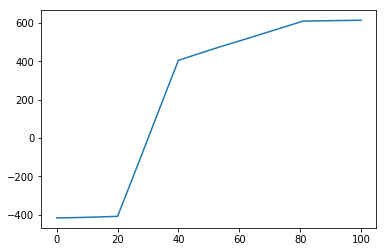

array([212.27010597])

In [130]:
plt.plot(coord[:,0])
plt.show()
coord[-1,2]-coord[0,2]

In [298]:
coord[:,1]

array([[-473.35994275],
       [-473.17096586],
       [-472.96466705],
       [-472.74051314],
       [-472.49808452],
       [-472.23708459],
       [-471.95734913],
       [-471.65885109],
       [-471.34170051],
       [-471.00614191],
       [-470.65254786],
       [-470.28140844],
       [-469.89331847],
       [-469.48896235],
       [-469.0690968 ],
       [-468.63453343],
       [-468.18612004],
       [-467.7247227 ],
       [-467.25120821],
       [-466.76642729],
       [-466.27119923],
       [-466.8843557 ],
       [-467.46842917],
       [-468.02150835],
       [-468.54038433],
       [-469.02121022],
       [-469.46004165],
       [-469.85311643],
       [-470.19672531],
       [-470.48664433],
       [-470.71735323],
       [-470.88151044],
       [-470.97015858],
       [-470.97383294],
       [-470.88424677],
       [-470.69590472],
       [-470.4070206 ],
       [-470.01946414],
       [-469.53785346],
       [-468.96811257],
       [-468.31582695],
       [-438.397

In [709]:
mat = scipy.io.loadmat('coords.mat')
coords_main = mat['coords'];
coords_main = coords_main*(-10);
coords_main[2,:]=-coords_main[2,:];
theta0_val =[];
theta1_val =[];
theta2_val =[];
x_coord_prelim = list(np.linspace(-867.9713127000001, coords_main[0,0], 20));
x_coord_prelim = np.array(x_coord_prelim+list(np.linspace(coords_main[0,0],coords_main[0,0], 10)));
#print(x_coord_prelim)
y_coord_prelim = list(np.linspace(-93.8392792, coords_main[1,0], 20));
y_coord_prelim = np.array(y_coord_prelim+list(np.linspace(coords_main[1,0],coords_main[1,0], 10)));
z_coord_prelim = list(np.linspace(-104.49010069999768, coords_main[2,0]+80, 20));
z_coord_prelim = np.array(z_coord_prelim+list(np.linspace(coords_main[2,0]+80, coords_main[2,0], 10)));
i=1;
j=0;
for m in range(30):
    theta0 = f_theta0(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,x_coord_prelim[m],y_coord_prelim[m],z_coord_prelim[m])
    theta0_val.append(theta0[j])
    #print(theta0[j])

    theta2=f_theta2(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,x_coord_prelim[m],y_coord_prelim[m],z_coord_prelim[m],0.5*np.pi+2.219992532,theta0[j])
    #print(theta2[i])
    theta2_val.append(theta2[i])
    theta1=f_theta1(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,x_coord_prelim[m],y_coord_prelim[m],z_coord_prelim[m],0.5*np.pi+2.219992532,theta0[j],theta2[i])
    theta1_val.append(theta1[i])
for k in range(101):
    theta0 = f_theta0(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,coords_main[0,k],coords_main[1,k],coords_main[2,k])
    theta0_val.append(theta0[j])
    #print(theta0[j])

    theta2=f_theta2(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,coords_main[0,k],coords_main[1,k],coords_main[2,k],0.5*np.pi+2.219992532,theta0[j])
    #print(theta2[i])
    theta2_val.append(theta2[i])
    theta1=f_theta1(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,coords_main[0,k],coords_main[1,k],coords_main[2,k],0.5*np.pi+2.219992532,theta0[j],theta2[i])
    theta1_val.append(theta1[i])
    #print(theta1[i])
print(coords_main[:,-1])

[621.45747764 141.63922345   5.        ]


In [348]:
import scipy.io
#mat = scipy.io.loadmat('theta.mat')
#theta = mat['ans'];


coord =[];
for k in range(131):
    coord.append(f_fk(0,21.51692807,374.7841274,350.6004152,206.7666738,0,93.8392792,0,0,0,theta0_val[k],theta1_val[k],theta2_val[k],0.5*np.pi+2.219992532-theta1_val[k]-theta2_val[k]));

coord = np.array(coord);
print(coord[29])
print(coord[-1])

[[-416.45364036]
 [-473.87040442]
 [-200.        ]
 [   1.        ]]
[[621.45747764]
 [141.63922345]
 [  5.        ]
 [  1.        ]]


In [703]:
err = np.reshape(coord[30:,0:3],(101,3)).T-coords_main
print(err.shape)
plt.plot(err.T)
#coord_pred =coord[30:,0:3];
#plt.plot(coord_pred[:,0])

(3, 101)


In [706]:
coord[-1,0:3]
coords_main[-1,0:3]

array([-200., -185., -170.])

In [694]:

import matplotlib.pyplot as plt
#plt.plot(coords_main[0,:])
#plt.plot(coords_main[1,:])
#plt.plot(coords_main[2,:])
%matplotlib qt
plt.plot(coord[:,0])
plt.plot(coord[:,1])
plt.plot(coord[:,2])
plt.show()
print(coord[31,1])

[-473.87040442]


In [751]:
import pickle as pkl
pkl.dump([np.array(theta0_val)-np.array(theta0_val[0]),np.array(theta1_val[0])-np.array(theta1_val),np.array(theta2_val[0])-np.array(theta2_val)], open("theta.pkl", "wb"))
pkl.dump([coord], open("theta.pkl", "wb"))

In [334]:
theta_pkl=pkl.load( open("theta.pkl", "rb"));
print(np.array(theta1_val)*180/np.pi)
#theta_pkl[1][31]*180/np.pi
#j

[ 176.75814294  167.54954632  163.35101802  160.22803727  157.68137473
  155.51629839  153.63300004 -208.02750209 -209.50329321 -210.82050327
 -211.99787221 -213.04930757 -213.98542273 -214.81451552 -215.54322038
 -216.17695979 -216.72026691 -217.17702194 -217.55062833 -217.8441454
 -218.06038786 -218.20199928 -218.27150425 -218.27134256 -218.20388792
 -218.0714535  -217.8762862  -217.62055166 -217.30631192 -216.93549784
 -216.93549784 -218.89429712 -220.82095416 -222.71221914 -224.56472556
  133.62496871  131.86033985  130.14485689  128.48194227  126.87493517
  125.32705877  123.84139243  122.42084959  121.06816204  119.78587101
  118.5763254   117.44168712  116.38394368  115.40492794  114.50634485
  113.68980545  109.99515033  106.57021908  103.41950966  100.56277934
   98.03217233   95.86900002   94.11949729   92.82938256   92.03765364
   91.77064039   92.03765364   92.82938256   94.11949729   95.86900002
   98.03217233  100.56277934  103.41950966  106.57021908  109.99515033
  113.6

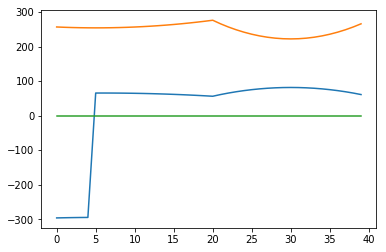

In [305]:
#plt.plot(np.array(theta0_val)*180/pi)
#plt.plot(np.array(theta[0,:])*180/pi)
plt.plot(-((np.array(theta1[0])-np.array(theta1_val[30:70]))-np.array(theta[1,0:40]))*180/pi)
plt.plot(-((np.array(theta2[0])-np.array(theta2_val[30:70]))-np.array(theta[2,0:40]))*180/pi)
plt.plot((np.array(theta0_val[30:70])-np.array(theta0_val[0])-np.array(theta[0,0:40]))*180/pi)

In [44]:
theta = mat['ans'];
len(theta[1,:])

In [182]:
len(res1)
res2[0]

In [174]:
res2[0]

In [106]:
nsimplify(Tor0.inv()*temp,10**-10,rational=True)

⎡⎛       2    ⎞                                                               
⎢⎝1 - sin (θ₀)⎠⋅(a₀ + a₁⋅cos(θ₀) + a₂⋅cos(θ₀)⋅cos(θ₁) + a₃⋅cos(θ₀)⋅cos(θ₁ + θ₂
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢      a₀⋅sin(θ₀) + (a₁⋅sin(θ₀) + a₂⋅sin(θ₀)⋅cos(θ₁) + a₃⋅sin(θ₀)⋅cos(θ₁ + θ₂)
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                                              
) + a₄⋅cos(θ₀)⋅cos(θ₁ + θ₂ + θ₃) + d₁⋅sin(θ₀) + d₂⋅sin(θ₀) + d₃⋅sin(θ₀) - d₄⋅s
───────────────────────────────────────────────────

In [89]:
temp

⎡a₀ + a₁⋅cos(θ₀) + a₂⋅cos(θ₀)⋅cos(θ₁) + a₃⋅cos(θ₀)⋅cos(θ₁ + θ₂) + a₄⋅cos(θ₀)⋅c
⎢                                                                             
⎢  a₁⋅sin(θ₀) + a₂⋅sin(θ₀)⋅cos(θ₁) + a₃⋅sin(θ₀)⋅cos(θ₁ + θ₂) + a₄⋅sin(θ₀)⋅cos(
⎢                                                                             
⎢                                          a₂⋅sin(θ₁) + a₃⋅sin(θ₁ + θ₂) + a₄⋅s
⎢                                                                             
⎣                                                                             

os(θ₁ + θ₂ + θ₃) + d₁⋅sin(θ₀) + d₂⋅sin(θ₀) + d₃⋅sin(θ₀) - d₄⋅sin(θ₁ + θ₂ + θ₃)
                                                                              
θ₁ + θ₂ + θ₃) - d₁⋅cos(θ₀) - d₂⋅cos(θ₀) - d₃⋅cos(θ₀) - d₄⋅sin(θ₀)⋅sin(θ₁ + θ₂ 
                                                                              
in(θ₁ + θ₂ + θ₃) + d₀ + d₄⋅cos(θ₁ + θ₂ + θ₃)                                  
                                                   

In [301]:
import math
math.atan2(1,2)